**Problem Statement**:
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

**Importing all the library**

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px 

**Read the data set**

In [3]:
app_data = pd.read_csv("application_data.csv")

**Print the head of data frame**

In [4]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Finding the shape of data set**

In [5]:
app_data.shape

(31081, 122)

**Printing Data info**

In [6]:
app_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31081 entries, 0 to 31080
Data columns (total 122 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    SK_ID_CURR                    31081 non-null  int64  
 1    TARGET                        31081 non-null  int64  
 2    NAME_CONTRACT_TYPE            31081 non-null  object 
 3    CODE_GENDER                   31081 non-null  object 
 4    FLAG_OWN_CAR                  31081 non-null  object 
 5    FLAG_OWN_REALTY               31081 non-null  object 
 6    CNT_CHILDREN                  31081 non-null  int64  
 7    AMT_INCOME_TOTAL              31081 non-null  float64
 8    AMT_CREDIT                    31081 non-null  float64
 9    AMT_ANNUITY                   31081 non-null  float64
 10   AMT_GOODS_PRICE               31055 non-null  float64
 11   NAME_TYPE_SUITE               30951 non-null  object 
 12   NAME_INCOME_TYPE              31081 non-null

**Displaying all rows & Columns**

In [7]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

**Checking missing values in application data**

In [8]:
app_data.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                    26
NAME_TYPE_SUITE                   130
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     20475
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

**Computing percentange of null values**

In [9]:
des =(app_data.isnull().sum()*100/len(app_data)).sort_values(ascending=False)
des

COMMONAREA_MODE                 70.142531
COMMONAREA_AVG                  70.142531
COMMONAREA_MEDI                 70.142531
NONLIVINGAPARTMENTS_MODE        69.589138
NONLIVINGAPARTMENTS_AVG         69.589138
NONLIVINGAPARTMENTS_MEDI        69.589138
LIVINGAPARTMENTS_MEDI           68.620701
LIVINGAPARTMENTS_AVG            68.620701
LIVINGAPARTMENTS_MODE           68.620701
FONDKAPREMONT_MODE              68.591744
FLOORSMIN_MODE                  67.938612
FLOORSMIN_AVG                   67.938612
FLOORSMIN_MEDI                  67.938612
YEARS_BUILD_MEDI                66.629130
YEARS_BUILD_MODE                66.629130
YEARS_BUILD_AVG                 66.629130
OWN_CAR_AGE                     65.876259
LANDAREA_MEDI                   59.563721
LANDAREA_AVG                    59.563721
LANDAREA_MODE                   59.563721
BASEMENTAREA_MEDI               58.498761
BASEMENTAREA_MODE               58.498761
BASEMENTAREA_AVG                58.498761
EXT_SOURCE_1                    56

In [10]:
des[des>40]

COMMONAREA_MODE                 70.142531
COMMONAREA_AVG                  70.142531
COMMONAREA_MEDI                 70.142531
NONLIVINGAPARTMENTS_MODE        69.589138
NONLIVINGAPARTMENTS_AVG         69.589138
NONLIVINGAPARTMENTS_MEDI        69.589138
LIVINGAPARTMENTS_MEDI           68.620701
LIVINGAPARTMENTS_AVG            68.620701
LIVINGAPARTMENTS_MODE           68.620701
FONDKAPREMONT_MODE              68.591744
FLOORSMIN_MODE                  67.938612
FLOORSMIN_AVG                   67.938612
FLOORSMIN_MEDI                  67.938612
YEARS_BUILD_MEDI                66.629130
YEARS_BUILD_MODE                66.629130
YEARS_BUILD_AVG                 66.629130
OWN_CAR_AGE                     65.876259
LANDAREA_MEDI                   59.563721
LANDAREA_AVG                    59.563721
LANDAREA_MODE                   59.563721
BASEMENTAREA_MEDI               58.498761
BASEMENTAREA_MODE               58.498761
BASEMENTAREA_AVG                58.498761
EXT_SOURCE_1                    56

**Dropping all values which have more than 40% value** 

In [11]:
app_data.drop(labels=list(des[des>40].index),axis=1,inplace=True)


**Data greater than 40%**

In [12]:
nw_data=(app_data.isnull().sum()*100/len(app_data)).sort_values(ascending=False)
nw_data


OCCUPATION_TYPE                31.437212
EXT_SOURCE_3                   19.780573
AMT_REQ_CREDIT_BUREAU_YEAR     13.516296
AMT_REQ_CREDIT_BUREAU_QRT      13.516296
AMT_REQ_CREDIT_BUREAU_MON      13.516296
AMT_REQ_CREDIT_BUREAU_WEEK     13.516296
AMT_REQ_CREDIT_BUREAU_DAY      13.516296
AMT_REQ_CREDIT_BUREAU_HOUR     13.516296
NAME_TYPE_SUITE                 0.418262
OBS_30_CNT_SOCIAL_CIRCLE        0.347479
DEF_30_CNT_SOCIAL_CIRCLE        0.347479
OBS_60_CNT_SOCIAL_CIRCLE        0.347479
DEF_60_CNT_SOCIAL_CIRCLE        0.347479
EXT_SOURCE_2                    0.257392
AMT_GOODS_PRICE                 0.083652
DAYS_LAST_PHONE_CHANGE          0.006435
FLAG_DOCUMENT_7                 0.003217
FLAG_DOCUMENT_2                 0.003217
FLAG_DOCUMENT_3                 0.003217
FLAG_DOCUMENT_4                 0.003217
FLAG_DOCUMENT_5                 0.003217
FLAG_DOCUMENT_6                 0.003217
FLAG_DOCUMENT_11                0.003217
FLAG_DOCUMENT_8                 0.003217
FLAG_DOCUMENT_9 

In [13]:
#New values which are greater than 0.
nw_data[nw_data>0]

OCCUPATION_TYPE               31.437212
EXT_SOURCE_3                  19.780573
AMT_REQ_CREDIT_BUREAU_YEAR    13.516296
AMT_REQ_CREDIT_BUREAU_QRT     13.516296
AMT_REQ_CREDIT_BUREAU_MON     13.516296
AMT_REQ_CREDIT_BUREAU_WEEK    13.516296
AMT_REQ_CREDIT_BUREAU_DAY     13.516296
AMT_REQ_CREDIT_BUREAU_HOUR    13.516296
NAME_TYPE_SUITE                0.418262
OBS_30_CNT_SOCIAL_CIRCLE       0.347479
DEF_30_CNT_SOCIAL_CIRCLE       0.347479
OBS_60_CNT_SOCIAL_CIRCLE       0.347479
DEF_60_CNT_SOCIAL_CIRCLE       0.347479
EXT_SOURCE_2                   0.257392
AMT_GOODS_PRICE                0.083652
DAYS_LAST_PHONE_CHANGE         0.006435
FLAG_DOCUMENT_7                0.003217
FLAG_DOCUMENT_2                0.003217
FLAG_DOCUMENT_3                0.003217
FLAG_DOCUMENT_4                0.003217
FLAG_DOCUMENT_5                0.003217
FLAG_DOCUMENT_6                0.003217
FLAG_DOCUMENT_11               0.003217
FLAG_DOCUMENT_8                0.003217
FLAG_DOCUMENT_9                0.003217


**Checking null count**

In [14]:
app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                  26
NAME_TYPE_SUITE                 130
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE             

**Transforming Day's birth into Age column**

In [15]:
app_data['AGE']= abs(app_data['DAYS_BIRTH']//365)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,53
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55


**Drop Days of Birth Column**

In [16]:
app_data = app_data.drop(['DAYS_BIRTH'],axis=1)

**Converting DAYS_EMPLOYED to YEARS_EMPLOYED**.

In [17]:
app_data['YEARS_EMPLOYED'] = abs(app_data['DAYS_EMPLOYED']//365)

**Dropping the column DAYS_EMPLOYED**

In [18]:
app_data = app_data.drop(['DAYS_EMPLOYED'],axis=1)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46,4
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,53,9
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,9


**Transforming columns into absolute values:**

In [19]:
#Transforming DAYS_REGISTRATION into absolute values.
app_data.DAYS_REGISTRATION = abs(app_data.DAYS_REGISTRATION)

In [20]:
#Transforming DAYS_ID_PUBLISH into absolute values.
app_data.DAYS_ID_PUBLISH = abs(app_data.DAYS_ID_PUBLISH)

In [21]:
#Converting DAYS_LAST_PHONE_CHANGE into absolute values.
app_data.DAYS_LAST_PHONE_CHANGE = abs(app_data.DAYS_LAST_PHONE_CHANGE)

In [22]:
#Checking the head of the data.
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46,4
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,53,9
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,9


**Imputing values which have XNA's:**

In [23]:
#Describing gender columns
app_data.CODE_GENDER.value_counts()

F    20438
M    10643
Name: CODE_GENDER, dtype: int64

In [24]:
#Dropping the rows with XNA values as there are only 4 XNA entries.
app_data = app_data[~(app_data['CODE_GENDER']=="XNA")]

In [25]:
#Inspecting if XNA's have been removed.
app_data.CODE_GENDER.value_counts()

F    20438
M    10643
Name: CODE_GENDER, dtype: int64

**ORGANIZATION_TYPE**

In [26]:
#Describing the value counts of the column organization type:
app_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    6765
XNA                       5606
Self-employed             3930
Other                     1699
Medicine                  1136
Business Entity Type 2    1061
Government                1058
School                     933
Trade: type 7              747
Kindergarten               698
Construction               656
Business Entity Type 1     581
Transport: type 4          509
Trade: type 3              360
Industry: type 9           348
Security                   336
Industry: type 3           331
Housing                    301
Industry: type 11          292
Military                   286
Bank                       263
Transport: type 2          260
Agriculture                229
Police                     228
Postal                     206
Security Ministries        200
Trade: type 2              193
Services                   186
Restaurant                 164
Industry: type 7           138
University                 128
Transport: type 3          125
Hotel   

In [27]:
#Dropping all XNA's.
app_data= app_data[~(app_data['ORGANIZATION_TYPE']=="XNA")]

In [28]:
#Recheck if XNA has been removed
app_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    6765
Self-employed             3930
Other                     1699
Medicine                  1136
Business Entity Type 2    1061
Government                1058
School                     933
Trade: type 7              747
Kindergarten               698
Construction               656
Business Entity Type 1     581
Transport: type 4          509
Trade: type 3              360
Industry: type 9           348
Security                   336
Industry: type 3           331
Housing                    301
Industry: type 11          292
Military                   286
Bank                       263
Transport: type 2          260
Agriculture                229
Police                     228
Postal                     206
Security Ministries        200
Trade: type 2              193
Services                   186
Restaurant                 164
Industry: type 7           138
University                 128
Transport: type 3          125
Hotel                      115
Industry

In [29]:
#Converting object data type into categorical column:
list(app_data.dtypes[app_data.dtypes=='object'].index)


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [30]:
#Converting all the above columns into category type.
app_data[['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE']] = app_data[['NAME_CONTRACT_TYPE',
 'CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE']].astype('category')

In [31]:
#Checking the head of the dataset.
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46,4
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,53,9
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,9


In [32]:
#Inspecting all the datatypes:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25475 entries, 0 to 31080
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   25475 non-null  int64   
 1   TARGET                       25475 non-null  int64   
 2   NAME_CONTRACT_TYPE           25475 non-null  category
 3   CODE_GENDER                  25475 non-null  category
 4   FLAG_OWN_CAR                 25475 non-null  category
 5   FLAG_OWN_REALTY              25475 non-null  category
 6   CNT_CHILDREN                 25475 non-null  int64   
 7   AMT_INCOME_TOTAL             25475 non-null  float64 
 8   AMT_CREDIT                   25475 non-null  float64 
 9   AMT_ANNUITY                  25475 non-null  float64 
 10  AMT_GOODS_PRICE              25451 non-null  float64 
 11  NAME_TYPE_SUITE              25362 non-null  category
 12  NAME_INCOME_TYPE             25475 non-null  category
 13  N

In [33]:
app_data['FLAG_OWN_CAR'] = np.where(app_data['FLAG_OWN_CAR']=="Y",1,0)

In [ ]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
0,100002,1.0,Cash loans,M,0,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,2120.0,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,2.0
1,100003,0.0,Cash loans,F,0,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291.0,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,4.0
2,100004,0.0,Revolving loans,M,1,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,2531.0,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,MONDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,1.0
3,100006,0.0,Cash loans,F,0,Y,0.0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,9833.0,2437.0,1.0,1.0,0.0,1.0,0.0,0.0,Laborers,2.0,2.0,2.0,WEDNESDAY,17.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,53.0,9.0
4,100007,0.0,Cash loans,M,0,Y,0.0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,4311.0,3458.0,1.0,1.0,0.0,1.0,0.0,0.0,Core staff,1.0,2.0,2.0,THURSDAY,11.0,0.0,0.0,0.0,0.0,1.0,1.0,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,9.0


**Binning age column**

In [34]:
app_data['AGE'].describe()

count    25475.000000
mean        40.945751
std         10.011913
min         22.000000
25%         33.000000
50%         40.000000
75%         49.000000
max         69.000000
Name: AGE, dtype: float64

In [35]:
def age_group(x):
    if (x< 20):
        return '0-20'
    elif (x>= 20 and x < 40):
        return '20-40'
    elif (x>= 40 and  x < 60):
        return '40-60'
    else:
        return '60+'

In [36]:
app_data['AGE_GROUP'] = app_data['AGE'].apply(age_group)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,AGE_GROUP
0,100002,1,Cash loans,M,0,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,20-40
1,100003,0,Cash loans,F,0,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46,4,40-60
2,100004,0,Revolving loans,M,1,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,1,40-60
3,100006,0,Cash loans,F,0,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,53,9,40-60
4,100007,0,Cash loans,M,0,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,9,40-60


**Applying the function**

In [37]:
app_data['AGE_GROUP'] = app_data['AGE'].apply(age_group)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,AGE_GROUP
0,100002,1,Cash loans,M,0,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,20-40
1,100003,0,Cash loans,F,0,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46,4,40-60
2,100004,0,Revolving loans,M,1,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,1,40-60
3,100006,0,Cash loans,F,0,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,53,9,40-60
4,100007,0,Cash loans,M,0,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,9,40-60


**Binning AMT_CREDIT**

In [38]:
round(app_data.AMT_CREDIT.describe(),2)

count      25475.00
mean      612428.16
std       406472.79
min        45000.00
25%       276813.00
50%       521280.00
75%       832500.00
max      4050000.00
Name: AMT_CREDIT, dtype: float64

In [39]:
#Function to create bins
def credit_group(x):
    if (x < 500000):
        return 'Low'
    elif (x >= 500000 and x < 800000):
        return 'Medium'
    else:
        return 'High'

In [40]:
#create a new column
app_data["CREDIT_GROUP"] = app_data['AMT_CREDIT'].apply(credit_group)

**Binning AMT_INCOME_TOTAL**

In [41]:
round(app_data.AMT_INCOME_TOTAL.describe(),1)

count        25475.0
mean        180167.9
std         738956.1
min          25650.0
25%         112500.0
50%         157500.0
75%         216000.0
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [42]:
#Creating a funtion to create bins.
def grouped_income(x):
    if (x < 100000):
        return 'Low'
    elif(x >= 100000 and x < 160000):
        return 'Medium'
    else:
        return 'High'

In [43]:
#Creating a new column and applying the function.
app_data['GROUPED_INCOME'] = app_data['AMT_INCOME_TOTAL'].apply(grouped_income)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,GROUPED_INCOME
0,100002,1,Cash loans,M,0,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,20-40,Low,High
1,100003,0,Cash loans,F,0,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46,4,40-60,High,High
2,100004,0,Revolving loans,M,1,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,1,40-60,Low,Low
3,100006,0,Cash loans,F,0,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,53,9,40-60,Low,Medium
4,100007,0,Cash loans,M,0,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,9,40-60,Medium,Medium


In [45]:
tar0_df=app_data.loc[app_data["TARGET"]==0]
tar1_df=app_data.loc[app_data["TARGET"]==1]

In [44]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

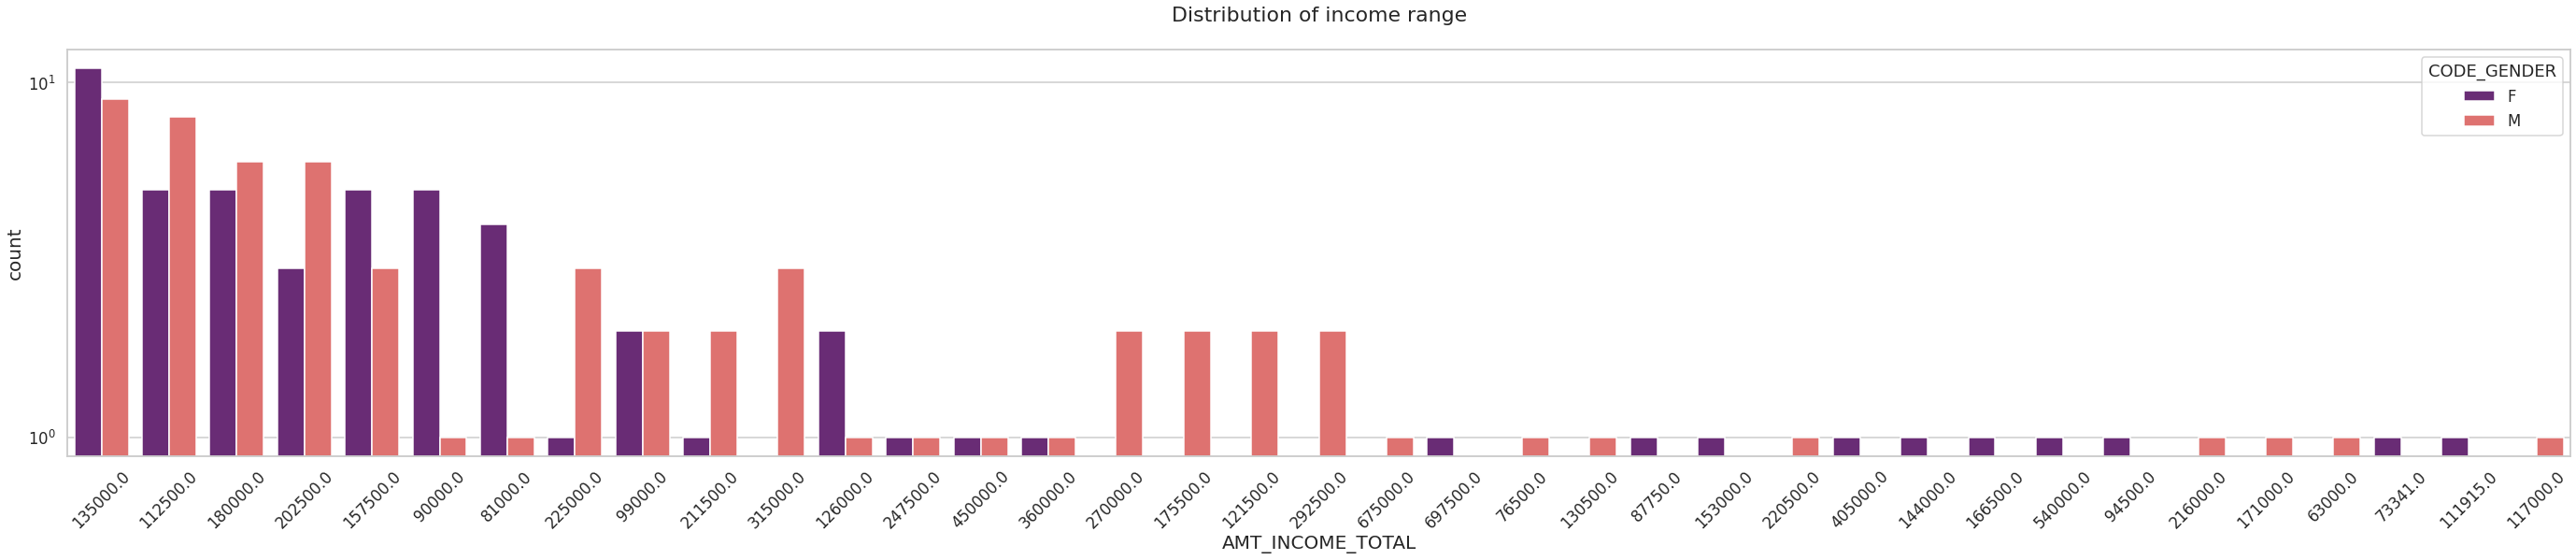

In [ ]:
uniplot(tar1_df,col='AMT_INCOME_TOTAL',title='Distribution of income range',hue='CODE_GENDER')

**OUTLIERS**

In [ ]:
#Finding outliers in age group column

In [46]:
app_data.AGE_GROUP.fillna(value=app_data.AGE_GROUP.mode()[0],inplace=True)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,GROUPED_INCOME
0,100002,1,Cash loans,M,0,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,20-40,Low,High
1,100003,0,Cash loans,F,0,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46,4,40-60,High,High
2,100004,0,Revolving loans,M,1,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,1,40-60,Low,Low
3,100006,0,Cash loans,F,0,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,53,9,40-60,Low,Medium
4,100007,0,Cash loans,M,0,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,9,40-60,Medium,Medium


In [47]:
#Finding outliers in CREDIT_GROUP:
app_data.CREDIT_GROUP.fillna(value=app_data.CREDIT_GROUP.mode()[0],inplace=True)

In [49]:
#Finding outliers in NAME_TYPE_SUITE:
app_data.NAME_TYPE_SUITE.fillna(value=app_data.NAME_TYPE_SUITE.mode()[0],inplace=True)

**Checking outliers in AMT_INCOME_TOTAL**

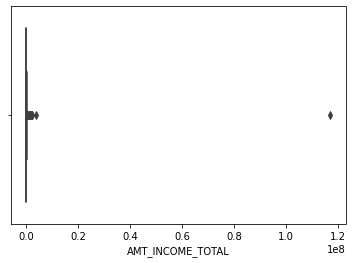

In [48]:
sns.boxplot(app_data.AMT_INCOME_TOTAL)
plt.show()

**Checking outliers in AMT_ANNUITY**

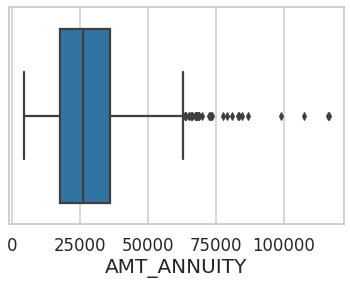

In [ ]:
sns.boxplot(app_data.AMT_ANNUITY)
plt.show()

**Checking outliers in AMT_REQ_CREDIT_BUREAU_YEAR**

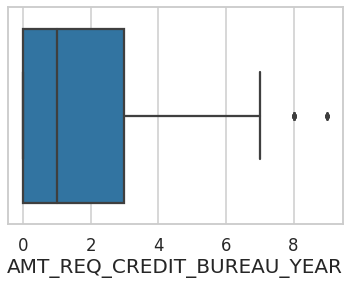

In [ ]:
sns.boxplot(app_data.AMT_REQ_CREDIT_BUREAU_YEAR)
plt.show()

**CNT_FAM_MEMBERS:**

In [ ]:
app_data.CNT_FAM_MEMBERS.isnull().sum()

1

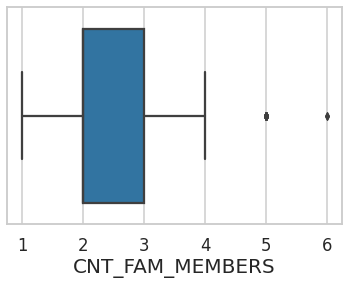

In [ ]:
sns.boxplot(app_data.CNT_FAM_MEMBERS)
plt.show()

In [ ]:
#Since there are outliers, we impute the values by median.
app_data.CNT_FAM_MEMBERS.fillna(value=app_data.CNT_FAM_MEMBERS.median(),inplace=True)
app_data.CNT_FAM_MEMBERS= app_data.CNT_FAM_MEMBERS.astype('int')

**Removing unwanted column**

In [50]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_

In [51]:
cols_unwanted = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE',
                    'FLAG_EMAIL','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START',
                    'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
                    'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8',
                    'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
                    'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR']

In [52]:
app_data.drop(labels= cols_unwanted, axis=1,inplace=True)


In [53]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AGE',
       'YEARS_EMPLOYED', 'AGE_GROUP', 'CREDIT_GROUP', 'GROUPED_INCOME'],
      dtype='object')

**Splitting the dataset into two different datasets:**

In [54]:
#TARGET=0 -  All other cases:
app_data_0 = app_data[app_data.TARGET==0]
#Checking the head of application_data_0.
app_data_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,GROUPED_INCOME
1,100003,0,Cash loans,F,0,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1186.0,291,Core staff,2.0,1,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,46,4,40-60,High,High
2,100004,0,Revolving loans,M,1,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,4260.0,2531,Laborers,1.0,2,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,53,1,40-60,Low,Low
3,100006,0,Cash loans,F,0,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,9833.0,2437,Laborers,2.0,2,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,NaN,53,9,40-60,Low,Medium
4,100007,0,Cash loans,M,0,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,4311.0,3458,Core staff,1.0,2,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,55,9,40-60,Medium,Medium
5,100008,0,Cash loans,M,0,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,4970.0,477,Laborers,2.0,2,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,1.0,47,5,40-60,Low,Low


In [55]:
#TARGET=1 - Client with payment difficulties:
app_data_1 = app_data[app_data.TARGET==1]
#Checking the head of application_data_1.
app_data_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,GROUPED_INCOME
0,100002,1,Cash loans,M,0,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,3648.0,2120,Laborers,1.0,2,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,26,2,20-40,Low,High
26,100031,1,Cash loans,F,0,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,6573.0,1827,Cooking staff,1.0,3,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,161.0,2.0,52,8,40-60,High,Medium
40,100047,1,Cash loans,M,0,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,1182.0,1029,Laborers,2.0,2,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,0.0,48,4,40-60,High,High
42,100049,1,Cash loans,F,0,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,45.0,4409,Sales staff,2.0,3,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,1480.0,0.0,37,10,20-40,Low,Medium
94,100112,1,Cash loans,M,1,Y,0,315000.0,953460.0,64107.0,900000.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,4802.0,1038,NaN,1.0,2,1,1,Industry: type 4,0.432340,0.077499,0.0,0.0,0.0,0.0,591.0,0.0,28,6,20-40,High,High


**DATA ANALYSIS**

Plotting pie chart

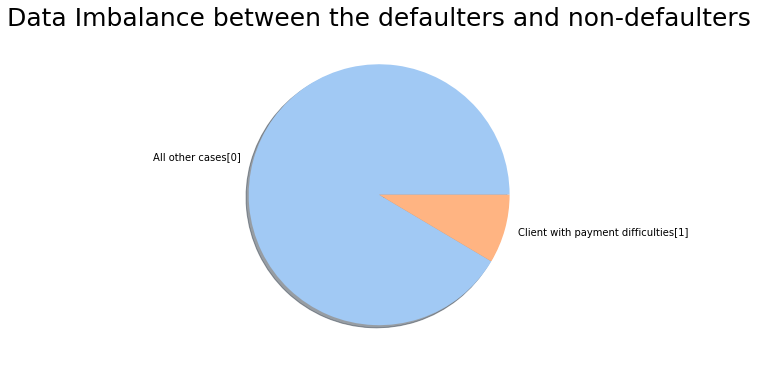

In [56]:
colors = sns.color_palette('pastel')
data = app_data.TARGET.value_counts()
plt.figure(figsize = (8,6))
plt.pie(data , labels = ['All other cases[0]','Client with payment difficulties[1]'], colors = colors,shadow=True)
plt.title("Data Imbalance between the defaulters and non-defaulters", fontdict={'fontsize':25,'fontweight':10})
plt.show()

**CONCLUSION**

In [57]:
#Non Defaulters are more than defaulters

UNIVARIATE ANALYSIS

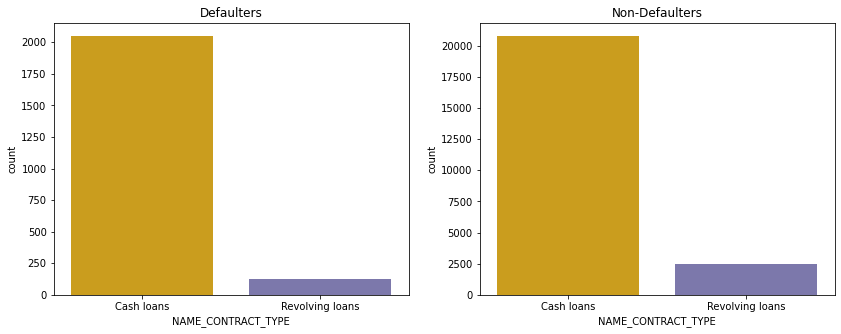

In [58]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=app_data_1,palette='Dark2_r')
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=app_data_0,palette='Dark2_r')
plt.title('Non-Defaulters')
plt.show()

**Conclusion**

As we can see both defaulters & non defaulters take high cash loans than revolving loans.

**CODE_GENDERS**

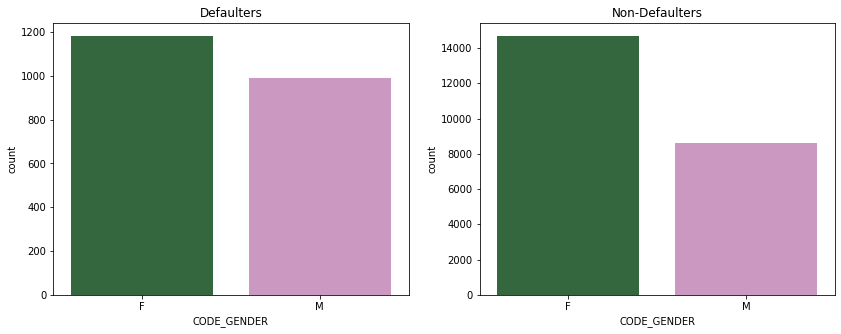

In [59]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=app_data_1,palette='cubehelix')
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=app_data_0,palette='cubehelix')
plt.title('Non-Defaulters')
plt.show()

**Conclusion**

 The count of females is definitely high as non-defaulters but at the same time they are the most riskiest to give loans to as they are the most defaulters as compare to men.Giving out loans to men is more logical in this case.

AGE_GROUP

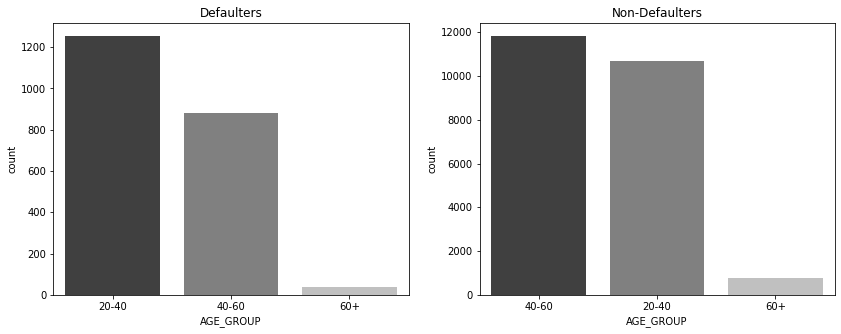

In [60]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'AGE_GROUP',data=app_data_1,palette='gist_gray')
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'AGE_GROUP',data=app_data_0,palette='gist_gray')
plt.title('Non-Defaulters')
plt.show()

**Conclusion**

 Clients in the age group of 40-60 are the clients who should be focused on for giving loans as they are the maximum non-defaulters. Clients above the age of 60+ also should be focused on as they are the least defaulters.Giving out credit to the age group of 20-40 is very risky, they should be given loans but at a very high interest rate.

**CREDIT_GROUP**

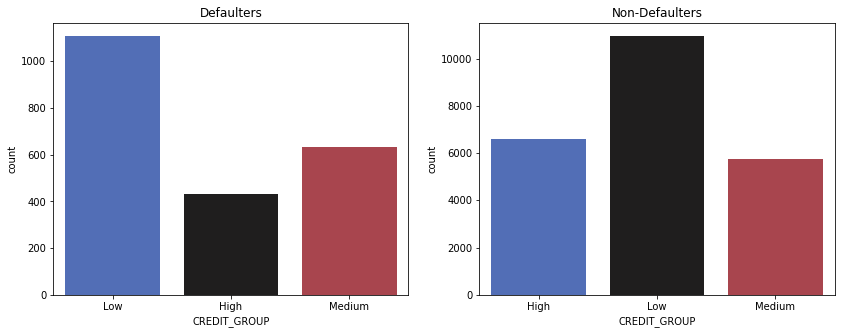

In [61]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CREDIT_GROUP',data=app_data_1,palette='icefire')
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CREDIT_GROUP',data=app_data_0,palette='icefire')
plt.title('Non-Defaulters')
plt.show()


**Conclusion**

In [ ]:
# High credit group ranges between 800000 and above.
# Medium credit group ranges between 500000-800000.
#Low credit group ranges between 500000 and below.

**Grouped Income**

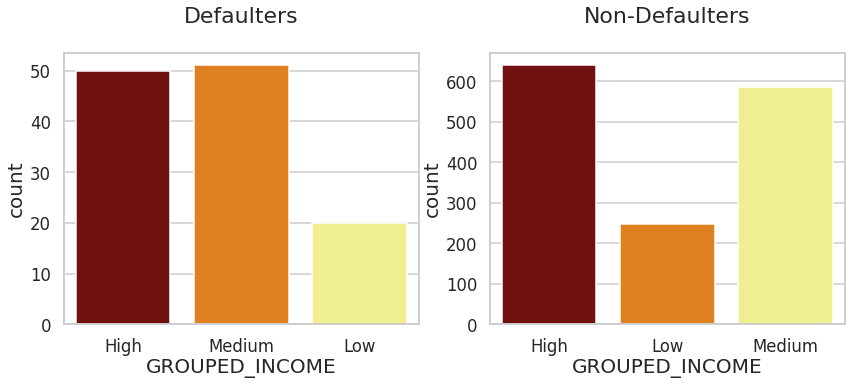

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'GROUPED_INCOME',data=app_data_1,palette='afmhot')
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'GROUPED_INCOME',data=app_data_0,palette='afmhot')
plt.title('Non-Defaulters')
plt.show()

**Conclusion**

In [ ]:
# High income group ranges between 160000 and above.
# Medium income group ranges between 100000-160000.
#Low income group ranges between 100000 and below.

Defaulters: As we can see from the above plots, giving loans to medium income groups seems a bit riskier as they are the highest defaulters followed by the high income groups.Low income grouped clients are the least defaulters .

• Non-Defaulters: Clearly, high income grouped clients are more capable of repaying the loans on time because of their income status followed by medium income grouped clients. As a matter of fact because of the income status, low income grouped clients do face difficulty in repaying back the loans.

**NAME_INCOME_TYPE:**

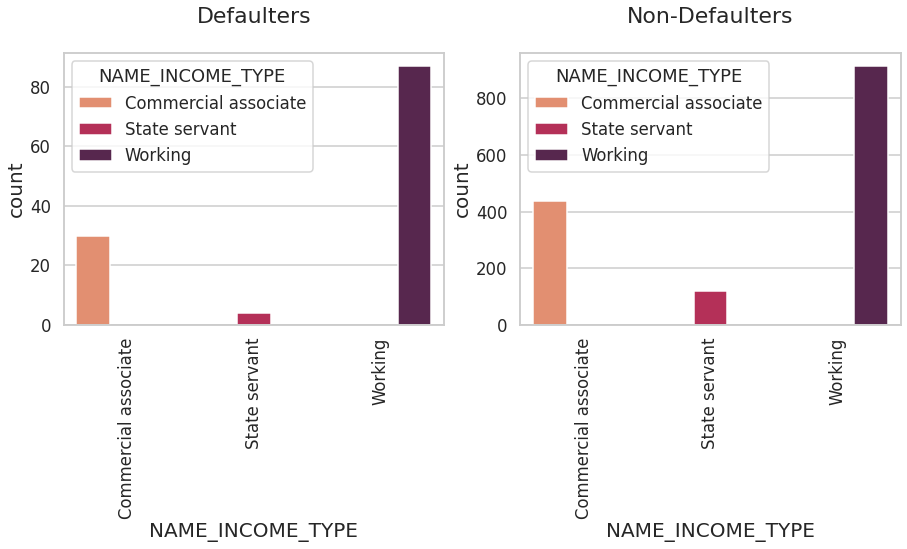

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)   
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=app_data_1,palette='rocket_r',hue='NAME_INCOME_TYPE')
plt.xticks(rotation=90)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=app_data_0,palette='rocket_r',hue='NAME_INCOME_TYPE')
plt.xticks(rotation=90)
plt.title('Non-Defaulters')
plt.show()

**Conclusion**

• Working class,commercial associate and state servants clients are the most defaulters, working class being the highest.Others are relatively lesser in number. Thus, we can think of giving credit to other income type groups such as students, pensioners, bussinessman etc.

NAME_EDUCATION_TYPE:

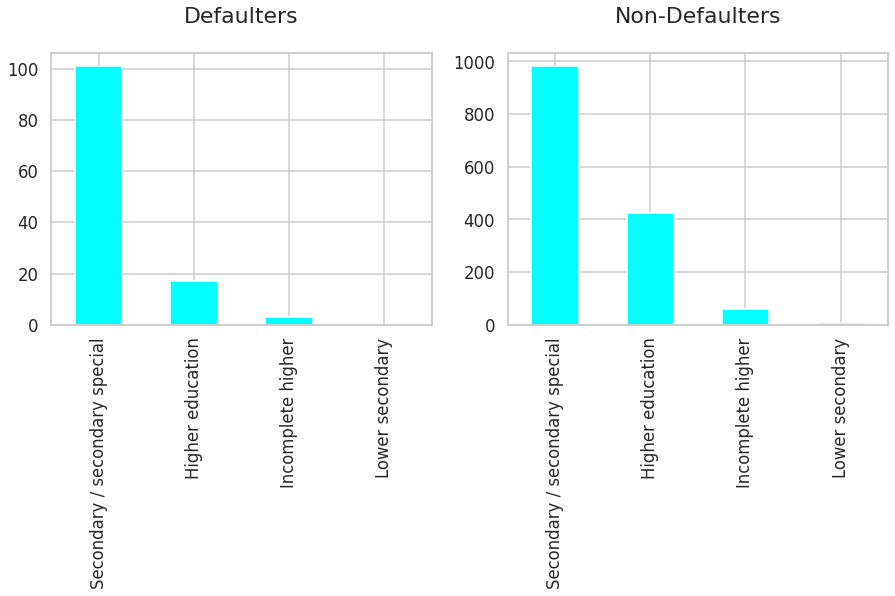

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)   
app_data_1['NAME_EDUCATION_TYPE'].value_counts().plot.bar(color='cyan')
plt.xticks(rotation=90)
plt.title('Defaulters')

plt.subplot(1,2,2) 
app_data_0['NAME_EDUCATION_TYPE'].value_counts().plot.bar(color='cyan')
plt.xticks(rotation=90)
plt.title('Non-Defaulters')
plt.show()

**Analysis**
• Secondary/secondary special group of clients are riskier customers to give loans to as they are the most defaulters. Higher education completed clients are less defaulters, thus we can think of giving loans to them.

**Analysing OCCUPATION_TYPE**

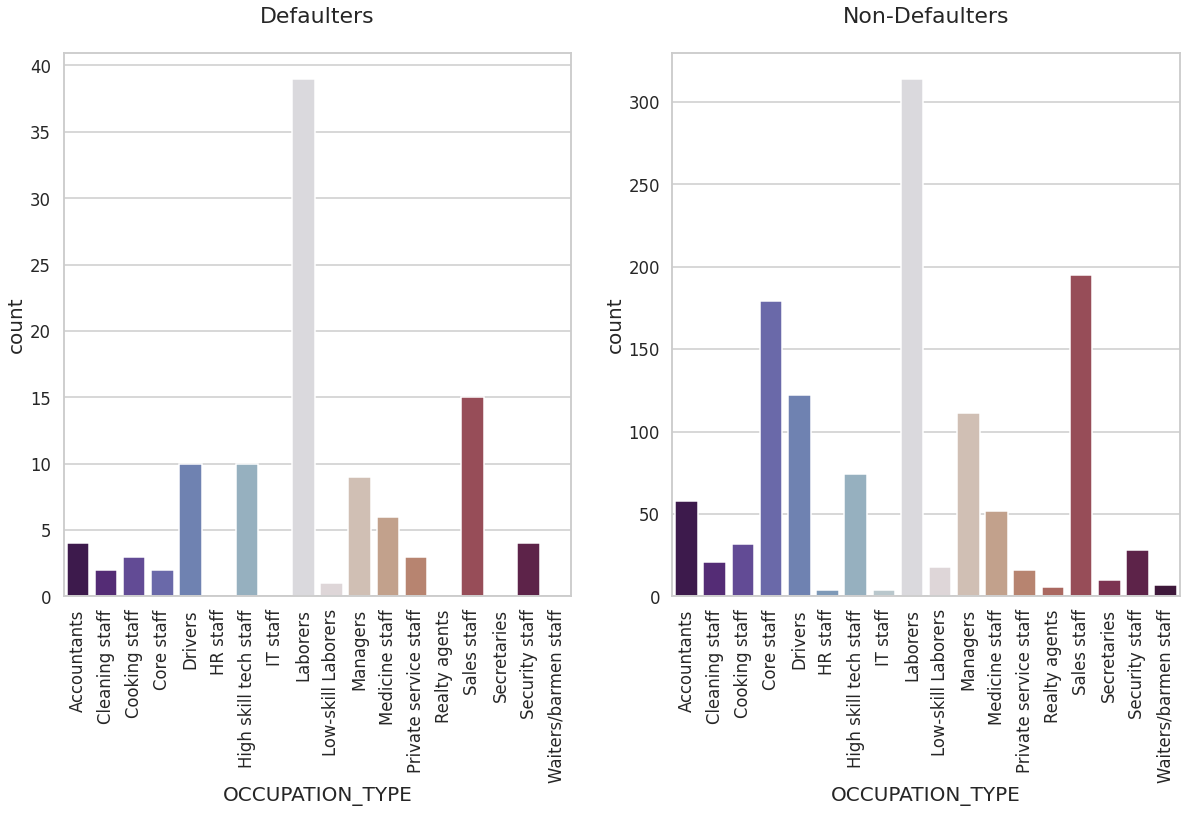

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)   
ax = sns.countplot(x = 'OCCUPATION_TYPE',data=app_data_1,palette='twilight_shifted')
plt.xticks(rotation=90)
plt.title('Defaulters')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'OCCUPATION_TYPE',data=app_data_0,palette='twilight_shifted')
plt.xticks(rotation=90)
plt.title('Non-Defaulters')
plt.show()

**Conclusion**

 Labourers are the type which take most loans and as per the count plot,they are the most riskier group to lend loans to followed by sales staff and drivers.

## **Analysing ORGANIZATION_TYPE:**

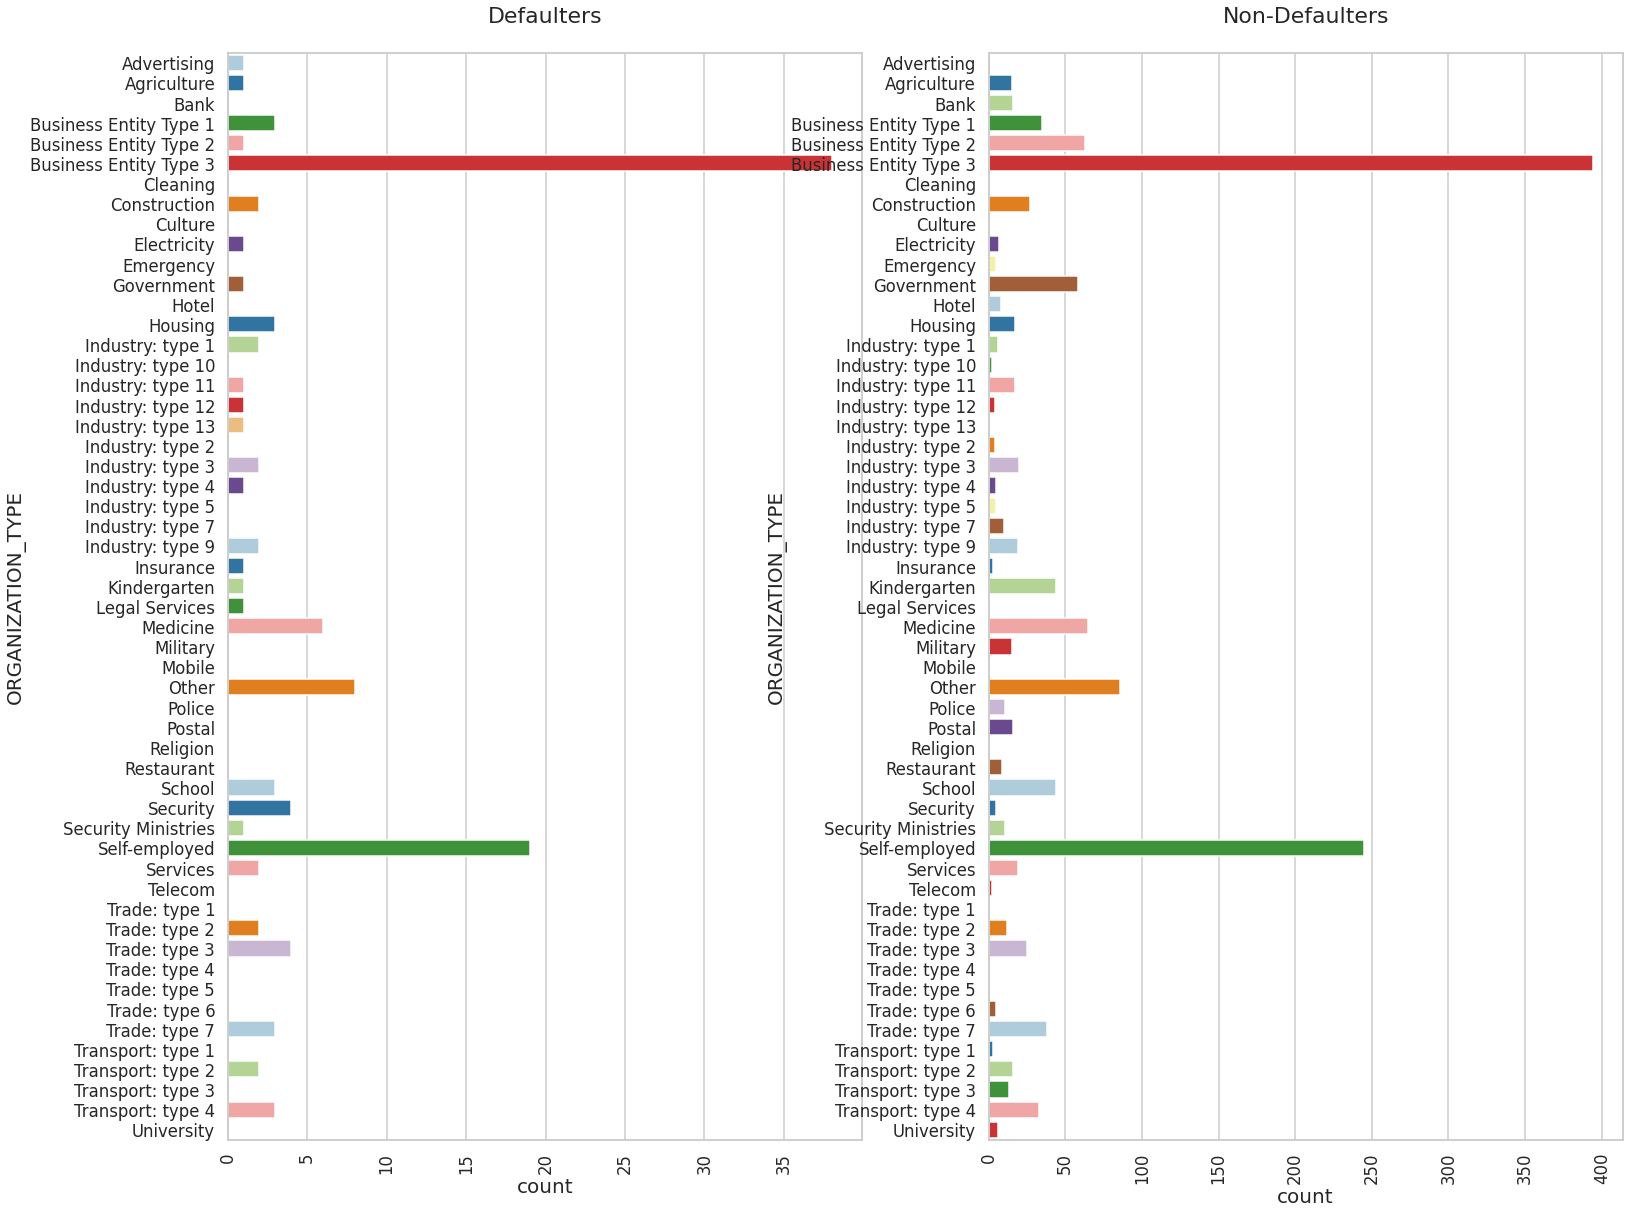

In [ ]:
plt.figure(figsize=(25,20))
plt.subplot(1,2,1) 
ax = sns.countplot(y = 'ORGANIZATION_TYPE',data=app_data_1,palette='Paired')
plt.xticks(rotation=90)
plt.title('Defaulters')
plt.subplot(1,2,2) 
ax = sns.countplot(y = 'ORGANIZATION_TYPE',data=app_data_0,palette='Paired')
plt.xticks(rotation=90)
plt.title('Non-Defaulters')
plt.show()

**Conclusion**

 Clients who have applied for credit and defaulted are the most from Business entity Type 3,Self employed,Other, Medicine and Government.

 • Less clients are from type 8,type 6, type 10, religion and trade type 5, type 4.

**BIVARIATE ANALYSIS**

***AMT_CREDIT VS NAME_EDUCATION_TYPE:***

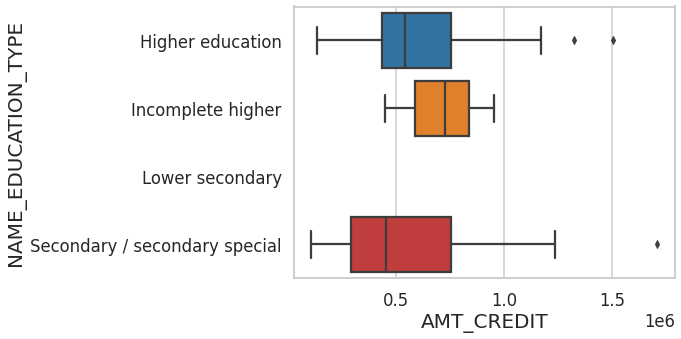

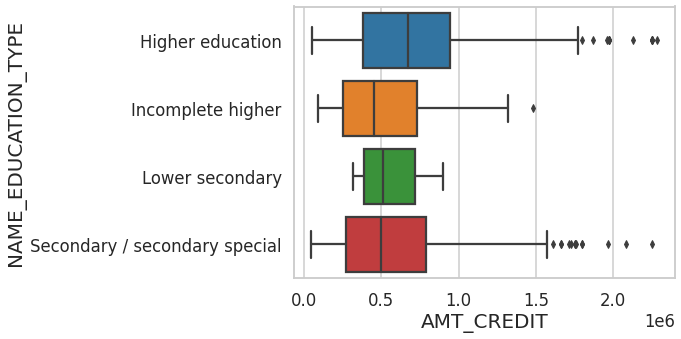

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=75)
plt.subplot(1,2,1) 
sns.boxplot(data =app_data_1, y='NAME_EDUCATION_TYPE',x='AMT_CREDIT')
plt.show()

plt.figure(figsize=(15,5))
plt.xticks(rotation=75)
plt.subplot(1,2,2) 
sns.boxplot(data =app_data_0, y='NAME_EDUCATION_TYPE',x='AMT_CREDIT')
plt.show()

**Conclusion**


• As we can see from the plots above, clients who have higher education have higher credit amount than the others. Secondary special and higher education also have many outliers.Academic degree clients also have more credits in the third quantile.

**NAME_INCOME_TYPE VS NAME_FAMILY_STATUS :**

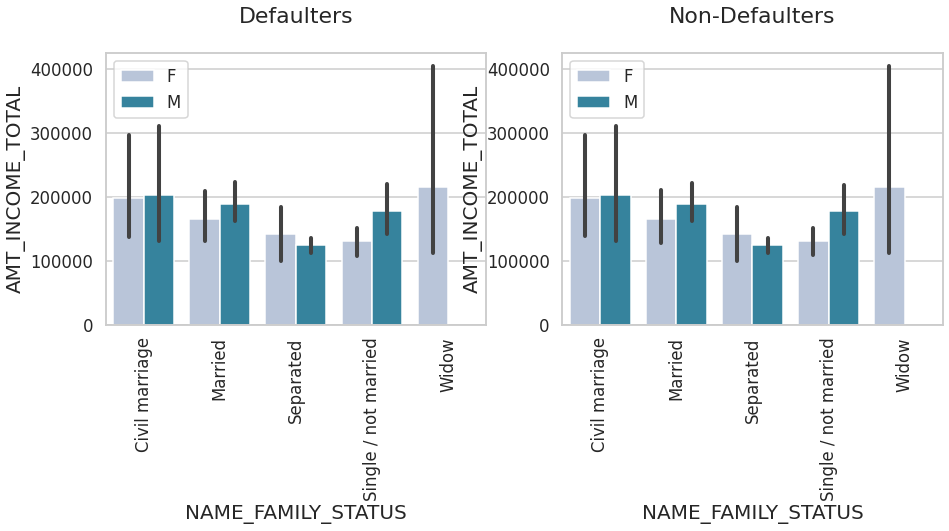

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)   
sns.barplot(data =app_data_1, x='NAME_FAMILY_STATUS',hue='CODE_GENDER',y='AMT_INCOME_TOTAL',palette='PuBuGn')
plt.xticks(rotation=90)
plt.title('Defaulters')
plt.legend(loc='upper left')

plt.subplot(1,2,2) 
sns.barplot(data =app_data_1, x='NAME_FAMILY_STATUS',hue='CODE_GENDER',y='AMT_INCOME_TOTAL',palette='PuBuGn')
plt.xticks(rotation=90)
plt.title('Non-Defaulters')
plt.legend(loc='upper left')
plt.show()

**Conclusion**
• Civil marriage males and Married males have the highest income total. Only widowed men and women have same income status. Thus, this group can be focused on when giving credit.

CNT_FAM_MEMBERS VS AMT_CREDIT :

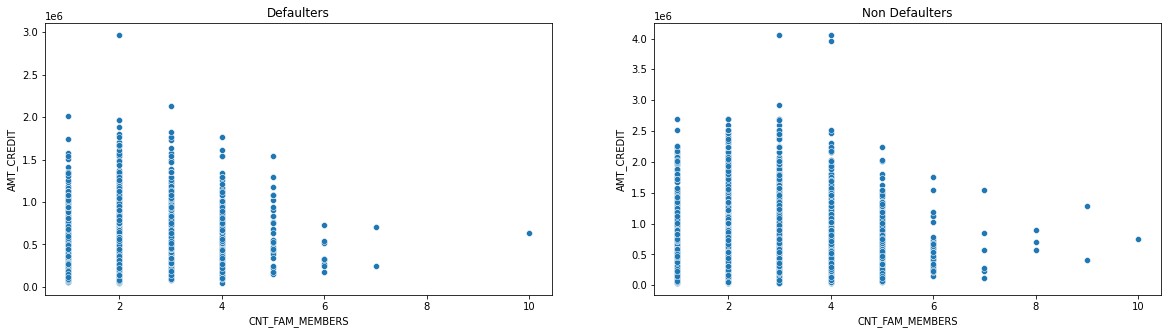

In [62]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax = sns.scatterplot('CNT_FAM_MEMBERS','AMT_CREDIT', data=app_data_1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot('CNT_FAM_MEMBERS','AMT_CREDIT', data=app_data_0)

plt.title('Non Defaulters')
plt.show()

**Conclusion**

• As we can see from the scatter plot above, clients who have less number of children(eg.2) take high credit loans and are likely to default, thus, making them risky customers.

CORRELATION OF APP_DATA_1 :

In [64]:
#Checking numeric columns.
numeric_columns = app_data_1.select_dtypes(include= 'number').columns
numeric_columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AGE',
       'YEARS_EMPLOYED'],
      dtype='object')

In [65]:
#Correlation for numeric columns.
corr_1= app_data_1[['AMT_CREDIT','AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','AGE','CNT_CHILDREN','YEARS_EMPLOYED','DAYS_ID_PUBLISH','REGION_RATING_CLIENT']].corr()
corr_1

,AMT_CREDIT,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AGE,CNT_CHILDREN,YEARS_EMPLOYED,DAYS_ID_PUBLISH,REGION_RATING_CLIENT
AMT_CREDIT,1.000000,0.742954,0.010138,0.982161,0.225570,0.015294,0.139595,0.056280,-0.025069
AMT_ANNUITY,0.742954,1.000000,0.010492,0.745889,0.111170,0.024642,0.080872,0.055299,-0.057580
AMT_INCOME_TOTAL,0.010138,0.010492,1.000000,0.007539,-0.004195,0.010677,-0.009554,0.015106,-0.012615
AMT_GOODS_PRICE,0.982161,0.745889,0.007539,1.000000,0.218947,0.004660,0.147358,0.063509,-0.031734
AGE,0.225570,0.111170,-0.004195,0.218947,1.000000,-0.170168,0.301470,0.126340,-0.049446
CNT_CHILDREN,0.015294,0.024642,0.010677,0.004660,-0.170168,1.000000,-0.016999,0.096919,0.055479
YEARS_EMPLOYED,0.139595,0.080872,-0.009554,0.147358,0.301470,-0.016999,1.000000,0.101686,0.000851
DAYS_ID_PUBLISH,0.056280,0.055299,0.015106,0.063509,0.126340,0.096919,0.101686,1.000000,-0.024902
REGION_RATING_CLIENT,-0.025069,-0.057580,-0.012615,-0.031734,-0.049446,0.055479,0.000851,-0.024902,1.000000


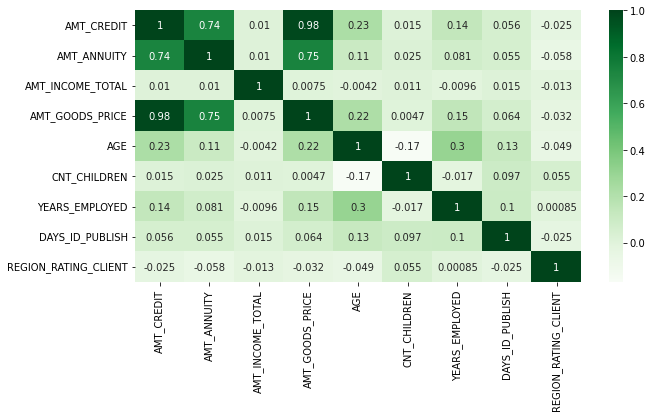

In [66]:
#Plotting heatmap for correlation.
plt.figure(figsize=(10,5))
sns.heatmap(corr_1,cmap='Greens',annot=True)
plt.show()

**Conclusion**

• AMT_CREDIT is inversely proportional to the CNT_CHILDREN, means the Credit amount is higher for fewer children count clients have and vice-versa.

• AMT_GOODS_PRICE is inversely proportional to the CNT_CHILDREN, means more goods price for fewer children clients have and vice-versa.

• AGE is positively proportionate to YEARS_EMPLOYED, means YEARS_EMPLOYED increases as AGE increases.

• AMT_CREDIT is positively proportionate to AGE, means the more the AGE, the more is the AMT_CREDIT.

• REGION_RATING_CLIENT is inversely related to AMT_CREDIT, means the more the REGION_RATING_CLIENT, the less AMT_CREDIT.

**CORRELATION OF APP_DATA_0 :**

In [68]:
corr_0= app_data_0[['AMT_CREDIT','AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','AGE','CNT_CHILDREN','YEARS_EMPLOYED','DAYS_ID_PUBLISH','REGION_RATING_CLIENT']].corr()
corr_0

,AMT_CREDIT,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AGE,CNT_CHILDREN,YEARS_EMPLOYED,DAYS_ID_PUBLISH,REGION_RATING_CLIENT
AMT_CREDIT,1.000000,0.766447,0.366440,0.986590,0.159544,-0.013135,0.091273,0.041196,-0.112466
AMT_ANNUITY,0.766447,1.000000,0.436384,0.771501,0.095810,-0.002131,0.059322,0.030956,-0.136263
AMT_INCOME_TOTAL,0.366440,0.436384,1.000000,0.374043,0.046701,-0.004507,0.039768,0.024651,-0.210791
AMT_GOODS_PRICE,0.986590,0.771501,0.374043,1.000000,0.154073,-0.018013,0.092790,0.041579,-0.115756
AGE,0.159544,0.095810,0.046701,0.154073,1.000000,-0.245426,0.351913,0.102669,-0.058053
CNT_CHILDREN,-0.013135,-0.002131,-0.004507,-0.018013,-0.245426,1.000000,-0.069608,0.121998,0.031935
YEARS_EMPLOYED,0.091273,0.059322,0.039768,0.092790,0.351913,-0.069608,1.000000,0.080717,0.006510
DAYS_ID_PUBLISH,0.041196,0.030956,0.024651,0.041579,0.102669,0.121998,0.080717,1.000000,-0.012130
REGION_RATING_CLIENT,-0.112466,-0.136263,-0.210791,-0.115756,-0.058053,0.031935,0.006510,-0.012130,1.000000


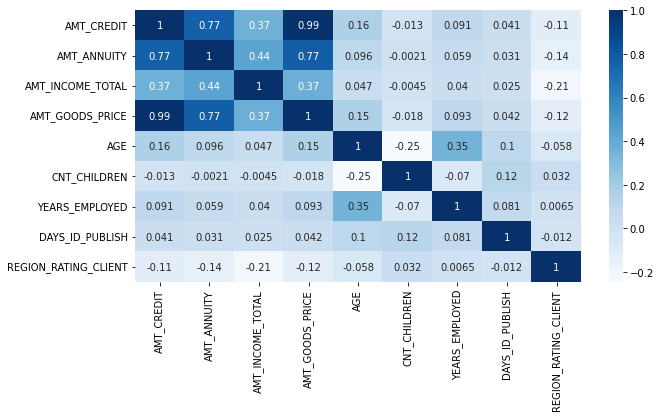

In [69]:
#Plotting the correlation, using heatmap:
plt.figure(figsize=(10,5))
sns.heatmap(corr_0,cmap='Blues',annot=True)
plt.show()

**Conclusion**

• CNT_CHILDREN is positively related to AMT_CREDIT, means the more the 

CNT_CHILDREN, the more is the AMT_CREDIT.

• AGE is inversely related to CNT_CHILDREN, means as AGE increases the CNT_CHILDREN decreases.

• AMT_GOODS_PRICE is positively related to AGE, means as AGE increases, AMT_GOODS_PRICE also increases.

• AMT_CREDIT is higher in a densely populated area.

• AMT_CREDIT is inversely proportional to the AGE , people belonging to the low-age group take high credit amount and vice-versa

**Previous Application Check**

In [72]:
# Reading previous dataset:
pre_app = pd.read_csv('previous_application.csv')
pre_app.head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


**Finding Shape of Previous DF**

In [74]:
pre_app.shape

(4196, 37)

In [76]:
#Checking null values in the dataset:
val =(pre_app.isnull().sum()*100/len(pre_app)).sort_values(ascending=False)
val

RATE_INTEREST_PRIVILEGED       99.571020
RATE_INTEREST_PRIMARY          99.571020
NAME_TYPE_SUITE                47.855100
RATE_DOWN_PAYMENT              44.685415
AMT_DOWN_PAYMENT               44.685415
NFLAG_INSURED_ON_APPROVAL      36.296473
DAYS_FIRST_DRAWING             36.296473
DAYS_FIRST_DUE                 36.296473
DAYS_LAST_DUE_1ST_VERSION      36.296473
DAYS_LAST_DUE                  36.296473
DAYS_TERMINATION               36.296473
AMT_GOODS_PRICE                19.494757
AMT_ANNUITY                    19.113441
CNT_PAYMENT                    19.113441
SELLERPLACE_AREA                0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
NAME_GOODS_CATEGORY             0.000000
PRODUCT_COMBINATION             0.000000
NAME_PORTFOLIO                  0.000000
SK_ID_PREV                      0.000000
NAME_CLIENT_TYPE                0.000000
CODE_REJECT_REAS

In [77]:
val[val>40]

RATE_INTEREST_PRIVILEGED    99.571020
RATE_INTEREST_PRIMARY       99.571020
NAME_TYPE_SUITE             47.855100
RATE_DOWN_PAYMENT           44.685415
AMT_DOWN_PAYMENT            44.685415
dtype: float64

In [78]:
#Removing columns which have more than 40% null values.
pre_app.drop(labels=list(val[val>40].index),axis=1,inplace=True)

In [79]:
#Checking length of columns.
len(pre_app.columns)

32

In [80]:
pre_app.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

**BOXPLOTS**

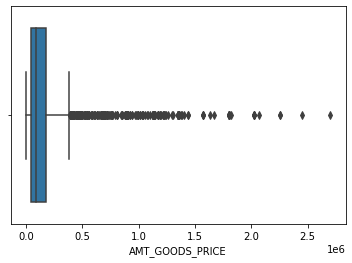

In [81]:
# Checking outliers in AMT_GOODS_PRICE:
sns.boxplot(pre_app.AMT_GOODS_PRICE)
plt.show()

In [ ]:
#Since there are outliers in AMT_GOODS_PRICE, we have to impute the values by median.
#previous_app.AMT_GOODS_PRICE.fillna(value=previous_app.AMT_GOODS_PRICE.median(),inplace=True)

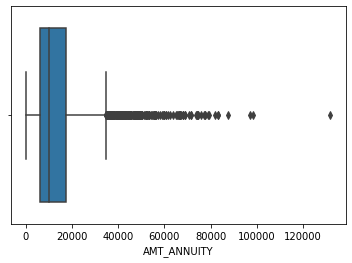

In [82]:
#Checking outliers in the column AMT_ANNUITY:
sns.boxplot(pre_app.AMT_ANNUITY)
plt.show()

**Univariate Analysis**

In [84]:
#Checking head of previous_app for univariate analysis.
pre_app.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


**NAME_CONTRACT_TYPE:**

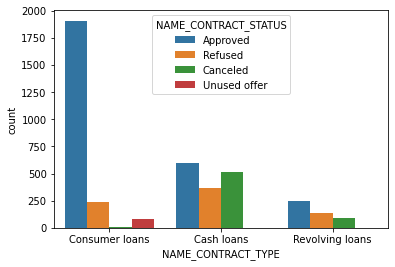

In [85]:
sns.countplot(pre_app.NAME_CONTRACT_TYPE,hue= pre_app.NAME_CONTRACT_STATUS)
plt.show()

**Analysis:**
• As we can see from, the countplot above, approved consumer loans are the highest, followed by cancelled cash loans and refused cash loans. Cash loans have the highest applications followed by consumer loans.



**NAME_PAYMENT_TYPE Columnn:**


In [87]:
#Removing XNA's from the column for better analysis.
pre_app= pre_app[pre_app['NAME_PAYMENT_TYPE']!="XNA"]

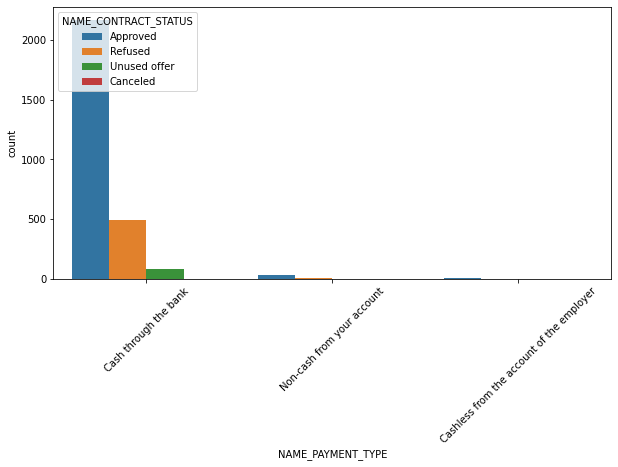

In [88]:
plt.figure(figsize=(10,5))
sns.countplot(pre_app.NAME_PAYMENT_TYPE,hue= pre_app.NAME_CONTRACT_STATUS)
plt.xticks(rotation=45)
plt.show()

**Analysis:**
• The most used mode of payment is cash through bank and the least used are non-cash from your account and cashless from the account of the employer.

Name_Product_Type

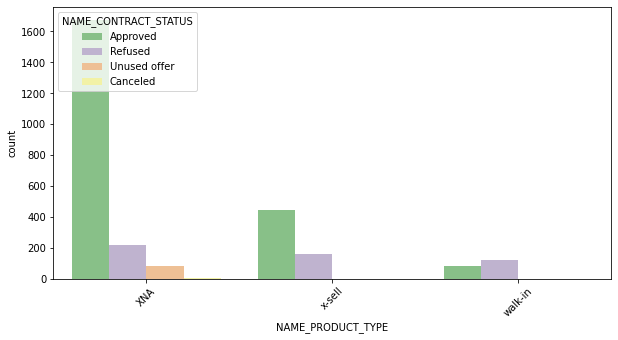

In [89]:
plt.figure(figsize=(10,5))
sns.countplot(pre_app.NAME_PRODUCT_TYPE,hue= pre_app.NAME_CONTRACT_STATUS,palette='Accent')
plt.xticks(rotation=45)
plt.show()

**Analysis:**
• x-sell applicants requests were approve more then walk-in applicants requests.

**Bivariate Analysis**

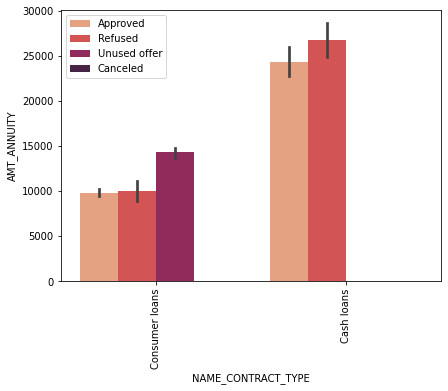

In [91]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)   
sns.barplot(data =pre_app, x='NAME_CONTRACT_TYPE',hue='NAME_CONTRACT_STATUS',y='AMT_ANNUITY',palette='rocket_r')
plt.xticks(rotation=90)
plt.legend(loc='upper left')

**Conclusion**
• As we can see, mostly cash loans were approved, more applications were for cash loans rather than consumer loans.

WEEKDAY_APPR_PROCESS_START verus NAME_CONTRACT_STATUS

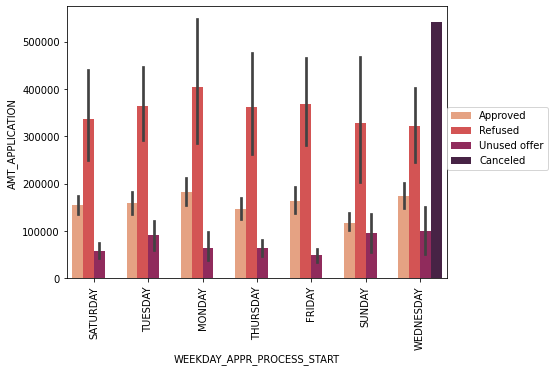

In [92]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)   
sns.barplot(data =pre_app, x='WEEKDAY_APPR_PROCESS_START',hue='NAME_CONTRACT_STATUS',y='AMT_APPLICATION',palette='rocket_r')
plt.xticks(rotation=90)
plt.legend(loc=(1,0.4))
plt.show()

**Conclusion**
• Most applications were cancelled on thursdays, most applications were approved on tuesdays and mondays.High amount applications were mostly cancelled.

**MERGING PREVIOUS DATASET WITH APPLICATION DATA**

In [93]:
#Merging the previous dataset with application_data:
mer_df= pd.merge(left=app_data,right=pre_app,how='inner',on='SK_ID_CURR')

In [94]:
#Getting head of the merged data:
mer_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,GROUPED_INCOME,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100151,0,Cash loans,M,0,N,0,135000.0,182016.0,11772.0,144000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.019101,4101.0,66,Accountants,1.0,2,0,0,Business Entity Type 3,0.695219,0.729567,0.0,0.0,0.0,0.0,398.0,1.0,46,4,40-60,Low,Medium,1614986,Cash loans,6535.800,45000.0,55075.5,45000.0,WEDNESDAY,13,Y,1,XNA,Approved,-1041,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,12.0,high,Cash Street: high,365243.0,-1011.0,-681.0,-681.0,-672.0,1.0
1,100201,0,Cash loans,F,0,Y,1,180000.0,675000.0,36747.0,675000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.035792,6189.0,1719,Core staff,2.0,2,0,0,Trade: type 2,0.601560,0.350696,10.0,0.0,10.0,0.0,1754.0,3.0,34,6,20-40,Medium,High,2227969,Consumer loans,3828.555,38610.0,29610.0,38610.0,THURSDAY,19,Y,1,XAP,Approved,-2424,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,31,Connectivity,10.0,high,POS mobile with interest,365243.0,-2393.0,-2123.0,-2123.0,-2120.0,0.0
2,100373,0,Cash loans,F,0,N,0,225000.0,906228.0,46269.0,810000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.030755,2347.0,4823,Core staff,2.0,2,0,0,School,0.625709,0.306202,0.0,0.0,0.0,0.0,1053.0,0.0,42,9,40-60,High,High,1891648,Consumer loans,10872.990,115695.0,115119.0,115695.0,SATURDAY,22,Y,1,XAP,Approved,-1053,Cash through the bank,XAP,New,Medicine,POS,XNA,Stone,25,Industry,12.0,low_normal,POS household with interest,365243.0,-1013.0,-683.0,-713.0,-709.0,0.0
3,100425,0,Cash loans,F,1,Y,2,90000.0,688500.0,20259.0,688500.0,Family,Working,Higher education,Married,House / apartment,0.025164,3476.0,5139,Core staff,4.0,2,0,0,Kindergarten,0.335586,0.710674,3.0,0.0,3.0,0.0,0.0,0.0,36,8,20-40,Medium,Low,1539382,Consumer loans,13410.270,120357.0,133065.0,120357.0,FRIDAY,15,Y,1,XAP,Approved,-589,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,2226,Consumer electronics,12.0,middle,POS household with interest,365243.0,-558.0,-228.0,-378.0,-351.0,0.0
4,100527,0,Revolving loans,F,0,N,0,112500.0,270000.0,13500.0,270000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,0.026392,4145.0,2081,Accountants,2.0,2,1,0,Bank,0.696210,0.669057,NaN,NaN,NaN,NaN,187.0,0.0,26,3,20-40,Low,Medium,1921372,Consumer loans,5420.115,50890.5,40720.5,50890.5,MONDAY,18,Y,1,XAP,Approved,-1507,Cash through the bank,XAP,New,Computers,POS,XNA,Country-wide,2326,Consumer electronics,10.0,high,POS household with interest,365243.0,-1475.0,-1205.0,-1205.0,-1200.0,0.0


In [95]:
#Checking shape of merged_df:
mer_df.shape

(175, 69)

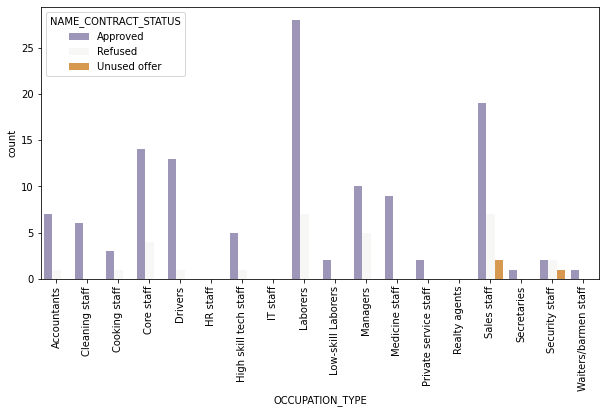

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(mer_df.OCCUPATION_TYPE,hue= mer_df.NAME_CONTRACT_STATUS,palette='PuOr_r')
plt.xticks(rotation=90)
plt.show()

**Conclusion:**
• As we can see, loans of laborers were the highest approved followed by sales staff, core staffs and managers.

**Bivariate Analysis**

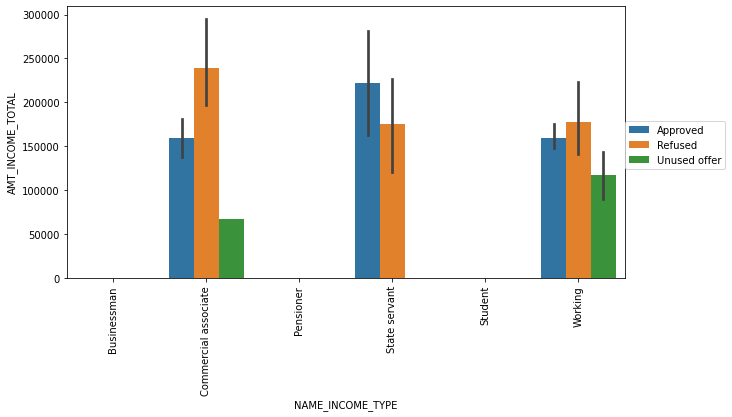

In [97]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(data =mer_df, x='NAME_INCOME_TYPE',hue='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL')
plt.legend(loc=(1,0.4))
plt.show()


**Conclusion:**

• High income clients have more cancelled loans. Students loans were mostly approve and only few were rejected.Pensioner's loans in the income group of 100000-150000 were mostly refused than approved.